In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Creating a list of countries to make models of 
country_list_sol = ['DE','DK_1','GB_GBN','SE'] #Germany,Denmark ,Great Britain,Sweden 
country_list_rad = ['DE','DK','GB','SE']
solar_gen_data_list =[]
radiation_data_list = []

In [3]:
solar_gen_data_list = []
# energygenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

# windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s. startswith('DE_wind_generation')),
#                         parse_dates=[0], index_col=0)

for i in country_list_sol:
    column_name = i +"_solar_generation_actual"
    solargenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 (s.startswith(column_name) &
                                  s.endswith("generation_actual"))),
                        parse_dates=[0], index_col=0)
    
    solar_gen_data_list.append(solargenerationdata)

#solargenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
 #                       usecols=(lambda s: s.startswith('utc') | 
  ##                     parse_dates=[0], index_col=0)


In [4]:
print(len(solar_gen_data_list))
for i in solar_gen_data_list:
    print(i)

4
                           DE_solar_generation_actual
utc_timestamp                                        
2004-12-31 23:00:00+00:00                         NaN
2005-01-01 00:00:00+00:00                         NaN
2005-01-01 01:00:00+00:00                         NaN
2005-01-01 02:00:00+00:00                         NaN
2005-01-01 03:00:00+00:00                         NaN
...                                               ...
2019-04-30 19:00:00+00:00                         NaN
2019-04-30 20:00:00+00:00                         NaN
2019-04-30 21:00:00+00:00                         NaN
2019-04-30 22:00:00+00:00                         NaN
2019-04-30 23:00:00+00:00                         NaN

[125593 rows x 1 columns]
                           DK_1_solar_generation_actual
utc_timestamp                                          
2004-12-31 23:00:00+00:00                           NaN
2005-01-01 00:00:00+00:00                           NaN
2005-01-01 01:00:00+00:00                    

In [5]:
# weatherdata = pd.read_csv("data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [6]:
radiation_data_list= []
for i in country_list_rad:
    i = i+ "_radiation"
    radiationdata = pd.read_csv("data/weather_data.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 (s.startswith(i) &
                                  (s.endswith("radiation_direct_horizontal") | s.endswith("radiation_diffuse_horizontal")))),
                        parse_dates=[0], index_col=0)
    
    radiation_data_list.append(radiationdata)

#solardata = pd.read_csv("data/weather_data.csv",
 #               usecols=(lambda s: s.startswith('utc') | 
  #                       s.startswith('DE_radiation_direct_horizontal') |
   #                      s.startswith('DE_radiation_diffuse_horizontal')),
        #        parse_dates=[0], index_col=0)

In [7]:
print(len(radiation_data_list))
for i in radiation_data_list:
    print(i)

4
                           DE_radiation_direct_horizontal  \
utc_timestamp                                               
1980-01-01 00:00:00+00:00                             0.0   
1980-01-01 01:00:00+00:00                             0.0   
1980-01-01 02:00:00+00:00                             0.0   
1980-01-01 03:00:00+00:00                             0.0   
1980-01-01 04:00:00+00:00                             0.0   
...                                                   ...   
2016-12-31 19:00:00+00:00                             0.0   
2016-12-31 20:00:00+00:00                             0.0   
2016-12-31 21:00:00+00:00                             0.0   
2016-12-31 22:00:00+00:00                             0.0   
2016-12-31 23:00:00+00:00                             0.0   

                           DE_radiation_diffuse_horizontal  
utc_timestamp                                               
1980-01-01 00:00:00+00:00                              0.0  
1980-01-01 01:00:00+0

In [21]:
#creating training data but cutting the data based on time stamp
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]


# training and data set

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-12-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove) & (windspeed.index < end_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_test = pd.to_datetime('2016-12-01')
# end_test = pd.to_datetime('2017-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

solardatatrain =[]
solargentrain = []
solardatatest = []
solargentest = []
# Cutting data based on time stamp, 2015-2016 for training, 2016-2017 for testing
start_train = pd.to_datetime('2015-01-01',utc = True)
end_train = pd.to_datetime('2016-01-01' , utc = True)
for i in range(0,len(solar_gen_data_list)):
    solardatatrain.append(solar_gen_data_list[i].loc[(solar_gen_data_list[i].index >= start_train) & (solar_gen_data_list[i].index < end_train)])
    solargentrain.append(radiation_data_list[i].loc[(radiation_data_list[i].index >= start_train) &(radiation_data_list[i].index < end_train)])
#solardatatrain = solardata.loc[(solardata.index >= start_train) & (solardata.index < end_train)]
#solargenerationtrain = solargenerationdata.loc[(solargenerationdata.index >= start_train) & (solargenerationdata.index < end_train)]

start_test = pd.to_datetime('2016-01-01', utc = True)
end_test = pd.to_datetime('2017-01-01', utc = True)
#solardatatest = solardata.loc[(solardata.index >= start_test)]
#solargenerationtest = solargenerationdata.loc[(solargenerationdata.index >= start_test) & (solargenerationdata.index < end_test)]
for i in range(0,len(solar_gen_data_list)):
    solardatatest.append(solar_gen_data_list[i].loc[(solar_gen_data_list[i].index >= start_test) & (solar_gen_data_list[i].index < end_test)])
    solargentest.append(radiation_data_list[i].loc[(radiation_data_list[i].index >= start_test) &(radiation_data_list[i].index < end_test)])

In [22]:
for i in solardatatrain:
    print(i)
for j in solargentrain:
    print(j)
for k in solardatatest:
    print(k)
for l in solargentest:
    print(l)

                           DE_solar_generation_actual
utc_timestamp                                        
2015-01-01 00:00:00+00:00                         0.0
2015-01-01 01:00:00+00:00                         0.0
2015-01-01 02:00:00+00:00                         0.0
2015-01-01 03:00:00+00:00                         0.0
2015-01-01 04:00:00+00:00                         0.0
...                                               ...
2015-12-31 19:00:00+00:00                         0.0
2015-12-31 20:00:00+00:00                         0.0
2015-12-31 21:00:00+00:00                         0.0
2015-12-31 22:00:00+00:00                         0.0
2015-12-31 23:00:00+00:00                         0.0

[8760 rows x 1 columns]
                           DK_1_solar_generation_actual
utc_timestamp                                          
2015-01-01 00:00:00+00:00                           0.0
2015-01-01 01:00:00+00:00                           0.0
2015-01-01 02:00:00+00:00                        

In [ ]:
# windspeedformatted.replace([np.inf, -np.inf], 0)

In [ ]:
#creating test/comparison data
# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [ ]:
solargenerationtrain

In [ ]:
# max(windgenerationdataformatted['DE_wind_generation_actual'])

In [ ]:
# min(windgenerationdataformatted['DE_wind_generation_actual'])

In [ ]:
solargenerationtrain = solargenerationtrain * 1e-3

In [ ]:
solargenerationtest = solargenerationtest * 1e-3

In [ ]:
solargenerationtest

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#train test might not be valid for our case because we have timestamps in play
# xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [ ]:
#inital model training attempt
# model = LinearRegression().fit(xtr,ytr)
# predicted = model.predict(windspeedformatted)

In [ ]:
#attempt at cross validation
# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [ ]:
#predict using train test split data
# predicted = model.predict(xts)

In [ ]:
# predicted

In [ ]:
#error when using model from cross validation
# predicted = model.predict(windspeedformatted)

In [ ]:
#timeseries used as x axis when plotting predicted
# timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [ ]:
# timeseries

In [ ]:
# windgenerationdataformatted.plot(linewidth=0.5)

In [ ]:
# I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
# plt.plot(timeseries,predicted, linewidth=0.5)

In [ ]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN.
No wind data past 2016
Only valid times for dataset is 2015-01-01 to 2017

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''

In [ ]:
# np.any(np.isnan(windspeedformatted))

In [ ]:
# np.all(np.isfinite(windspeedformatted))

In [ ]:
# windspeedformatted = windspeedformatted[~windspeedformatted.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
# np.where(windspeedformatted.values >= np.finfo(np.float64).max)

In [ ]:
# windspeedformatted

In [ ]:
# np.any(np.isnan(windspeedformatted))

In [ ]:
# windgenerationdataformatted

In [23]:
model_list =[]
for i in range(0,len(solardatatrain)):
    model =LinearRegression().fit(solardatatrain[i],solargentrain[i])
    model_list.append(model)
    print (i)

0
1
2
3


In [24]:
#using the previously formatted data which is data from 2015
prediction_list = []
for i in range(0,len(solardatatrain)): # We have 4 items in solardata train
    prediction = model_list[i].predict(solardatatest[i])
    prediction_list.append(prediction)


In [34]:
print(prediction.shape)

(8784, 2)


In [31]:
timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')
print(timeseries.shape)

(8784,)


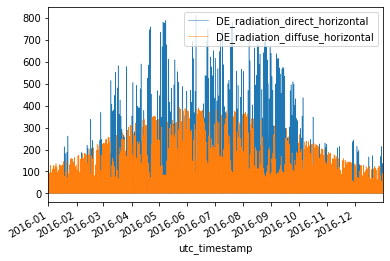

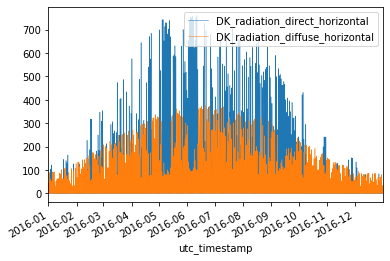

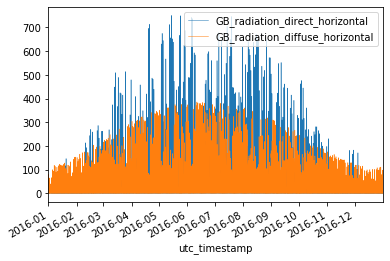

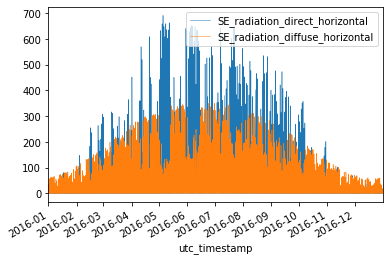

In [26]:
for i in range (0,4):
    
    solargentest[i].plot(linewidth=0.5)

IndexError: index 2 is out of bounds for axis 1 with size 2

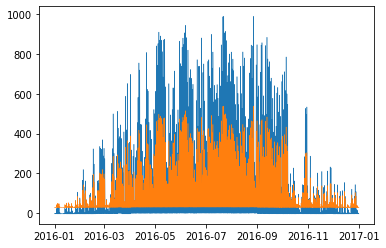

In [35]:
for i in range(0,4):
    plt.plot(timeseries,prediction[:,i], linewidth=0.5) #Plotting predictions from each model

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(solargenerationtest, prediction))

In [ ]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
print(mean_squared_error(solargenerationtest, prediction))

In [ ]:
print(np.sum((solargenerationtest-prediction)**2)/(prediction.shape[0]))

In [ ]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''